In [1]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.ramsey as gordon
from importlib import reload
import qubic.state_disc as sd
import time
import chipcalibration.config as cfg

In [2]:
# instantiate runner and load xsa file (i.e. PL bitfile)
# use load_xsa=False if you don't want to reload bitfile
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [3]:
qchipname = 'X4Y2'
chanmap = {'Q0':2,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':7}

fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

In [4]:
target_qubits = ['Q0', 'Q1', 'Q2', 'Q3']

In [5]:
reload(gordon)
delayTime = np.linspace(0,50.e-6,75)
sRam = gordon.Ramsey(target_qubits,delayTime,qchip, fpga_config, channel_config)


done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


In [6]:
start = time.time()
sRam.run(runner,1000)
sRam._fit_gmm()
print(time.time() - start)

TypeError: dictionary key must be string

In [10]:
75*1000*500.e-6

37.5

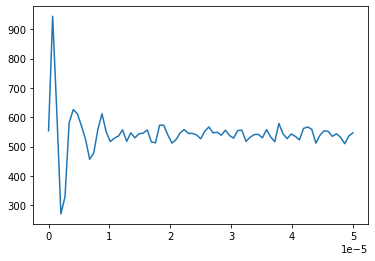

In [67]:
#plt.plot(sRam.zeros_frac['Q2'])
#plt.plot(sRam.ones_frac['Q2'])
plt.plot(delayTime,sRam.ones_frac['Q0'])

In [69]:
sRam.fit_ramsey_freq({q: [720, 500, 500e3, 0,1.5e-5] for q in target_qubits})

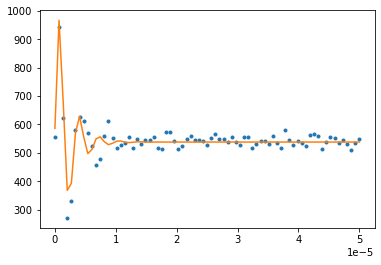

In [70]:
plt.plot(delayTime,sRam.ones_frac['Q0'], '.')
plt.plot(delayTime,sRam._cos_exp(delayTime, *sRam.param['Q0'][0]))

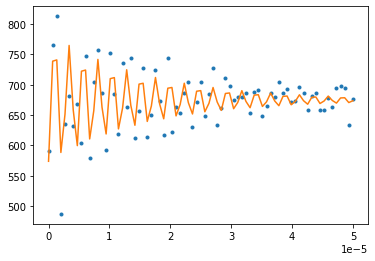

In [72]:
plt.plot(delayTime,sRam.ones_frac['Q1'], '.')
plt.plot(delayTime,sRam._cos_exp(delayTime, *sRam.param['Q1'][0]))

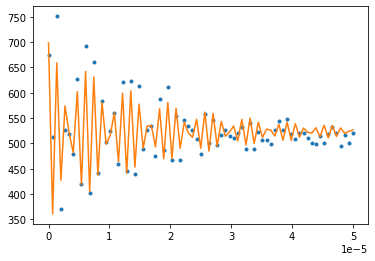

In [73]:
plt.plot(delayTime,sRam.ones_frac['Q2'], '.')
plt.plot(delayTime,sRam._cos_exp(delayTime, *sRam.param['Q2'][0]))

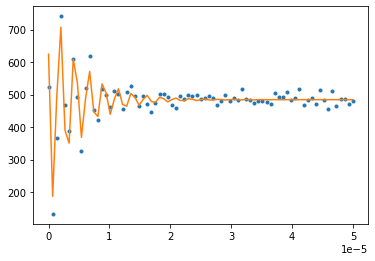

In [74]:
plt.plot(delayTime,sRam.ones_frac['Q3'], '.')
plt.plot(delayTime,sRam._cos_exp(delayTime, *sRam.param['Q3'][0]))